# The Do-calculus


$$P(y_x|x',y')$$
$$P(Y_x) = P(Y|do(x)) = P_x(Y)$$


## Rule 1: Ignoring observations


$$\newcommand\ci{\perp\!\!\!\perp}$$
$$\newcommand{\ubar}[1]{\underset{\bar{}}{#1}}
\newcommand{\obar}[1]{\overset{\bar{}}{#1}}$$

$$P(y|do(x),{\color{blue}z},w) = P(y|do(x),w)\text{ if } ( Y\ci Z|X,W )_{G_{\bar{X}}}$$

or in the Shpitser notation:

$$P_x(y|{\color{blue}z},w) = P_x(y|w)\text{ if } ( Y\ci Z|X,W )_{G_{\bar{X}}}$$

## Rule 2: Action/Observation Change

$$P(y|do(x), \color{red}{do(z)}, w) = P(y|do(x),\color{red} z, w)\text{ if } (Y\ci Z|X,W)_{G_{\bar{X},\ubar{Z}}}$$
or in Shpitser notation:

$$P_{x,\color{red}z}(y|w) = P_x(y|\color{red}z,w) \text{ if } (Y\ci Z|X,W)_{G_{\bar{X},\ubar{Z}}}$$

Where $G_{\bar{X},\ubar{Z}}$  is taken to mean the graph obtained from $G$ by removing arrows pointing to $X$ and arrows leaving $Z$. 

# Rule 3: Ignoring actions

$$P(y|do(x),\color{green}{do(z)},w) = P(y|do(x),w)\text{ if }(Y\ci Z|X,W)_{G_{\bar{X}\bar{Z(W)}}}$$

where $Z(W)$ is the set of $Z$ nodes not ancestors of any $W$-node in $G_{\bar{X}}$.



# Theorem 2: The bow arc is not identifiable.

We construct two causal models $M^1$ and $M^2$ such that $P^1(X, Y)=P^2(X, Y)$ ,and $P^1_x(Y)\ne P^2_x(Y)$.The two models agree on the following: all 3 variables are boolean, $U$ is a fair coin, and $f_X(u)=u$.Let $⊕$ denote the exclusive or (XOR) function. Then the value of $Y$ is determined by the function $u⊕x$ in $M^1$, while $Y$ is set to $0$ in $M^2$. Then $P^1(Y=0)=P^2(Y=0)=1$, $P^1(X=0)=P^2(X=0)=0.5$. Therefore, $P^1(X, Y)=P^2(X, Y)$, while $P^2_x(Y=0)=1\ne P^1_x(Y=0)=0.5$. Note that while $P$ is non-positive, it is straightforward to modify the proof for the positive case by letting $f_Y$ functions in both models return 1 half the time, and the values outlined above half the time.

In [ ]:
from scipy.stats import bernoulli
def Model1(u):
    x = u
    y = x ^ u
    return x, y

def Model2(u):
    x = u
    y = 0
    return x,y
def sample(size=1000, p=0.5):
    u = bernoulli.rvs(p, size=size)
    unique, counts = numpy.unique(u, return_counts=True)
    return dict(zip(unique, [c/size for c in counts]))
def P1(X=None,Y=None,p=0.5, size=1000):
    u = bernoulli.rvs(p,size=size)
    joint = [Model1(u_i) for u_i in u]
    count = 0

        for x,y in joint: 
            if X and Y and X==x and Y==y:
                count +=1
            elif
            
    

        dict(zip(unique, counts))

# C-component
Let $G$ be a semi-Markovian graph such that a subset of its bidirected arcs forms a spanning tree over all vertices in $G.$Then $G$ is a C-component(confounded component).

Let a path composed entirely of bidirected
edges be called a bidirected path. The set of variables $V$ can
be partitioned into disjoint groups by assigning two variables
to the same group if and only if they are connected by a
bidirected path. 

# Definition 4: (C-tree)

Let $G$ be a semi-Markovian graph such that $G$ is a C-component, all observable nodes have at most one child, and there is a node $Y$ such that $An(Y)_G= G$.Then $G$ is a $Y$-rooted C-tree (confounded tree).


# A tree is not a Computer science tree!

In computer science, the root of a tree has no parents, and the leaves have no children. And all children have only one parent.

In the Pearlian world, the root of a tree has no children, and all nodes have at most one child. The issue is that the arrows point in the opposite direction.  

# $An( Y )$ includes $Y$

From "[A General Identification Condition for Causal Effects](https://ftp.cs.ucla.edu/pub/stat_ser/R290-A.pdf)" by Tian and Pearl 2002:

Let  $An( S )$ denote  the  union  of  a  set $S$ and  the  set  of ancestors of the variables in $S$, and let $G_{An( S )}$ denote the subgraph of $G$ composed only of variables in $An( S )$.

# A complete identification algorithm. 

**FAIL** propagates through recursive calls like an exception, and returns the hedge which witnesses non-identifiability. $V_\pi^{(i-1)}$ is the set of nodes preceding $V_i$ in some topological ordering $\pi$ in $G$.

1. If no action has been taken, the effect on $\mathbf Y$ is just the marginal of the observational distribution $P(\mathbf v)$ on $\mathbf Y$. 
2. If we are interested in the effect on $\mathbf Y$, it is sufficient to restrict our attention on the parts of the model ancestral to $\mathbf Y$.
3. Forces an action on any node where such an action would have no effect on $\mathbf Y$—assuming we already acted on $\mathbf X$. Since actions remove incoming arrows, we can view line 3 as simplifying the causal graph we consider by removing certain arcs from the graph, without affecting the overall answer.
4. The key line of the algorithm, it decomposes the problem into a set of smaller problems using the key property of *c-component factorization* of causal models. If the entire graph is a single C-component already, further problem decomposition is impossible, and we must provide base cases. $\mathbf{ID}$ has three base cases. 
5. Fails because it finds two C-components, the graph $G$ itself, and a subgraph $S$ that does not contain any $\mathbf X$ nodes. But that is exactly one of the properties of C-forests that make up a hedge. In fact, it turns out that it is always possible to recover a hedge from these two c-components.
6. Asserts that if there are no bidirected arcs from X to the other nodes in the current subproblem under consideration, then we can replace acting on X by conditioning, and thus solve the subproblem. 
7. The most complex case where $\mathbf X$ is partitioned into two sets, $\mathbf W$ which contain bidirected arcs into other nodes in the subproblem, and $\mathbf Z$ which do not. In this situation, identifying $P(\mathbf y|do(\mathbf x))$ from $P(v)$ is equivalent to identifying $P(\mathbf y|do(\mathbf w))$ from $P(\mathbf V|do(\mathbf z))$, since $P(\mathbf y|do(\mathbf x)) = P(\mathbf y|do(\mathbf w), do(\mathbf z))$. But the term $P(\mathbf V|do(\mathbf z))$ is identifiable using the previous base case, so we can consider the subproblem of identifying $P(\mathbf y|do(\mathbf w))$.


$\text{function }\mathbf{ID}\left(\mathbf y, \mathbf x, P, G\right) \\ \text{INPUT: } \mathbf{x,y}\text{ value assignments, $P$ a probability distribution, $G$ a causal diagram}. \\  \text{OUTPUT:  Expression for $P_{\mathbf x}(\mathbf y)$ in terms of $P$ or $\mathbf{FAIL}(F, F')$} $



1. $\text{if }{\mathbf x} =\emptyset \text{ return }\sum_{\mathbf v - \mathbf y}P({\mathbf v})$. &nbsp;&nbsp;&nbsp; 
2. $\text{if }\mathbf V - An(\mathbf Y)_G \neq \emptyset \\  \text{ return } \mathbf{ ID}\left(\mathbf y, \mathbf x\cap An(\mathbf Y)_G, \sum_{\mathbf V - An(Y)_G}P, G_{An(\mathbf Y)}\right)$.
3. $\text{let }\mathbf W = (\mathbf V - X) - An(\mathbf Y)_{G_{\bar{\mathbf X}}}. \\ \text{if } \mathbf W \neq \emptyset, \text{ return } \mathbf{ID}\left(\mathbf y, \mathbf x\cup \mathbf w, P, G\right)$.
4. $\text{if }C(G-\mathbf X) = \{S_1,\ldots S_k\} \\ \text{ return }\sum_{\mathbf v - (\mathbf y \cup \mathbf x)}\prod_i\mathbf{ID}\left(s_i, \mathbf v - s_i, P, G\right) \\ \text{if }C(G -\mathbf X) = \{S\}$
5. &nbsp; &nbsp;&nbsp;$\text{       if }C(G) = \{G\},\\  \text{ throw }\mathbf{FAIL}\left(G,G\cap S\right)$.
6. &nbsp; &nbsp;&nbsp;$\text{ if }S\in C(G) \\ \text{ return }\sum_{S - \mathbf y}\prod_{\{i|V_i\in S\}}P\left(v_i|v_\pi^{(i-1)}\right)$
7. &nbsp; &nbsp;&nbsp;$\text{ if }(\exists S')S\subset S'\in C(G) \\ \text{ return }\mathbf{ID}\left(\mathbf y, \mathbf x\cap S', \prod_{\{i|V_i\in S'\}}P(V_i|V_\pi^{(i-1)}\cap S', V_\pi^{(i-1)} - S'), G_{S'}\right)$.



## Example
We give an example of the operation of the algorithm by identifying $P_x (y_1, y_2 )$ from $P(v)$ in the graph shown in in Fig. 3 (a). 

Since $G = G_{An(\{Y_1, Y_2\})}$, $C(G- \{X\})=\{G\}$, and $\mathbf{W} = \{W_1\}$ , we invoke line $3$ and attempt to identify $P_{x,w}(y_1, y_2 )$. 

Now $C(G-\{X, W\}) = \{Y_1,  W_2 \leftarrow Y_2\}$, so we invoke line $4$.  

Thus the original problem reduces to identifying $\sum_{w_2}P_{x,w_1, w_2, y_2} (y_1 )P_{w,x,y_1}(w_2, y_2 )$. 

Solving for the second expression, we trigger line $2$, noting that we can ignore nodes which are not ancestors of $W_2$ and $Y_2$ , which means $P_{w,x,y_1}(w_2, y_2 ) = P(w_2, y_2 )$. 

Solving for the first expression, we first trigger line $2$ also, obtaining $P_{x,w_1, w_2, y_2} (y_1 ) = P_{x, w}(y_1 )$. 

The corresponding $G$ is shown in Fig. 5 (a). 

Next, we trigger line $7$, reducing the problem to computing $P_w (y_1 )$ from $P(Y_1 | X,  W1 )P(W_1 )$.

The corresponding $G$ is shown in Fig. 5 (b). 

Finally, we trigger line $2$, obtaining $P_w(y_1 ) = \sum_{w_1} P(y_1 | x , w_1 )P(w_1)$. 

Putting everything together, we obtain: $P_x(y_1, y_2 ) = \sum_{w_2} P(y_1, w_2 ) \sum_{w_1} P(y_1  | x ,  w_1 )P(w_1 )$. 

In [1]:
from y0.dsl import P, Sum, X, Y, Z, Product, Variable
from y0.mutate import canonicalize
expected = Sum[Z](P(Y,Z))
actual = Sum[Z](P(Z, Y))
expected_vars = expected.get_variables()
ordering = list(expected_vars)
expected_canonical = canonicalize(expected, ordering)
actual_canonical = canonicalize(actual, ordering)

print(f"Expected: {expected_canonical}\nActual:   {actual_canonical}")

Expected: [ sum_{Z} P(Y,Z) ]
Actual:   [ sum_{Z} P(Y,Z) ]


In [2]:
from ananke.graphs import ADMG
from y0.algorithm.conditional_independencies import are_d_separated
from y0.examples import (vertices_without_edges,
                         line_1_example,
                         line_2_example, 
                         line_3_example, 
                         line_4_example, 
                         line_6_example,
                         line_7_example, 
                         figure_6a
                        )
from y0.identify import _get_outcomes, _get_treatments
from y0.algorithm.identify.id_std import (
    line_2, 
    line_3, 
    line_4, 
    line_6, 
    line_7,
    #ancestors_and_self
)
from y0.algorithm.identify import (
    identify,
    idc
)

from y0.algorithm.identify.id_c import rule_2_of_do_calculus_applies
from y0.algorithm.identify.utils import (
    get_outcomes_and_treatments, 
    expr_equal,
)
from y0.mutate import canonicalize


from y0.graph import NxMixedGraph
admg = ADMG(vertices=['X','Y', 'Z'], di_edges=[['X','Y'],['Y','Z']], bi_edges=[['X','Z']])
expected = vertices_without_edges
actual = NxMixedGraph.from_admg( admg )
set(expected.graph.directed.nodes())

{'W', 'X', 'Y', 'Z'}

In [4]:
for ident in figure_6a.identifications:
    id_in = ident['id_in'][0]
    id_out = ident['id_out'][0]
    print(rule_2_of_do_calculus_applies(id_in.outcomes, id_in.treatments, id_in.conditions, Z, id_in.graph))
    actual = idc(
        outcomes=id_in.outcomes,
        treatments=id_in.treatments,
        conditions=id_in.conditions,
        graph=id_in.graph,
        estimand=id_in.estimand
    )
actual

True


Fraction(numerator=Product(expressions=(P(Distribution(children=(Variable(name='Y'),), parents=(Variable(name='X'), Variable(name='Z')))),)), denominator=Sum(expression=Product(expressions=(P(Distribution(children=(Variable(name='Y'),), parents=(Variable(name='X'), Variable(name='Z')))),)), ranges=(Variable(name='Y'),)))

In [3]:
id_in.graph.draw()

NameError: name 'id_in' is not defined

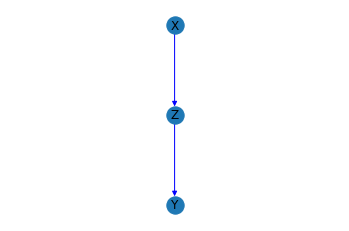

In [5]:
id_in.graph.intervene(id_in.treatments).draw()

In [6]:
id_in.graph.intervene(id_in.treatments).remove_outgoing_edges_from(id_in.conditions).directed.edges()


OutEdgeView([(Variable(name='X'), Variable(name='Z'))])

In [11]:
outcomes

{Variable(name='Y'), Variable(name='Z')}

In [10]:
outcomes = id_in.outcomes
condition = Z
conditions = id_in.conditions
treatments = id_in.treatments

admg = id_in.graph.intervene(treatments).remove_outgoing_edges_from(frozenset([condition])).to_admg()
judgements = [
        are_d_separated(
            admg, outcome, condition, conditions=list(treatments | (conditions - {condition}))
        )
        for outcome in outcomes
    ]
judgements

[True -- 'Y' d-sep 'Z' conditioned on (Variable(name='X'),),
 False -- 'Z' d-sep 'Z' conditioned on (Variable(name='X'),)]

In [6]:
for id3 in line_3_example.identifications:
        identification = id3["id_in"][0]
        outcomes = identification.outcomes
        treatments = identification.treatments
        estimand = identification.estimand
        graph = identification.graph.str_nodes_to_variable_nodes()
        vertices = set(graph.nodes())
        outcomes_and_ancestors = ancestors_and_self(graph, outcomes)
        not_outcomes_or_ancestors = vertices.difference(outcomes_and_ancestors)
        outcome_ancestral_graph = graph.subgraph(outcomes_and_ancestors)
    
        intervened_graph = graph.intervene(treatments)
        no_effect_on_outcome = (vertices - treatments) - ancestors_and_self(intervened_graph, outcomes)

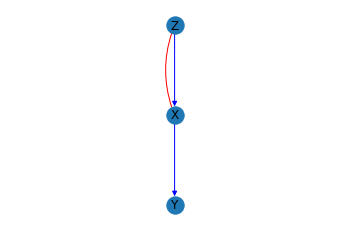

In [9]:
intervened_graph.draw()

In [11]:
intervened_graph.nodes()

NodeView((Variable(name='Z'), Variable(name='X'), Variable(name='Y')))

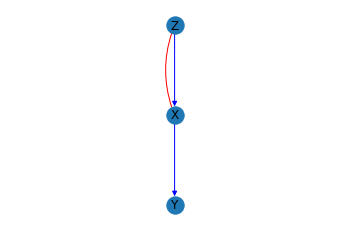

In [12]:
graph.draw()

In [14]:
treatments

{Intervention(name='X', star=False)}

In [5]:
for  identification in line_3_example.identifications:
            outcomes, treatments = get_outcomes_and_treatments(
                query=identification["id_in"][0].query
            )
            expected=identification["id_out"][0]
            actual=line_3(
                    outcomes=outcomes,
                    treatments=treatments,
                    estimand=identification["id_in"][0].estimand,
                    graph=identification["id_in"][0].graph,
                )
            


NetworkXError: The node Y_{X} is not in the graph.

In [9]:
outcomes, treatments = get_outcomes_and_treatments(
                query=identification["id_in"][0].query
            )
for outcome in outcomes:
    print(outcome)
    print(outcome.name)

Y_{X}
Y


In [6]:
outcomes

{CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False),))}

{Intervention(name='Z', star=False), CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False), Intervention(name='Z', star=False))), Intervention(name='X', star=False)}


P(Distribution(children=(CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False), Intervention(name='Z', star=False))),), parents=()))

None

{Intervention(name='Z', star=False), CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False), Intervention(name='Z', star=False))), Intervention(name='X', star=False)}


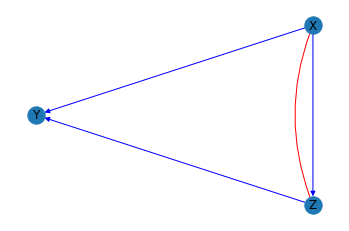

In [3]:
for identification in line_6_example.identifications:
    for id_in in identification['id_in']:
        print(id_in.query.get_variables())
        display(id_in.query)
        display(id_in.graph.draw())
    for id_out in identification['id_out']:
        print(id_out.query.get_variables())
        #display(id_out.graph.draw())

{Intervention(name='X', star=False), Intervention(name='W1', star=False), CounterfactualVariable(name='Y1', interventions=(Intervention(name='X', star=False), Intervention(name='W1', star=False)))}


P(Distribution(children=(CounterfactualVariable(name='Y1', interventions=(Intervention(name='X', star=False), Intervention(name='W1', star=False))),), parents=()))

None

{CounterfactualVariable(name='Y1', interventions=(Intervention(name='W1', star=False),)), Intervention(name='W1', star=False)}


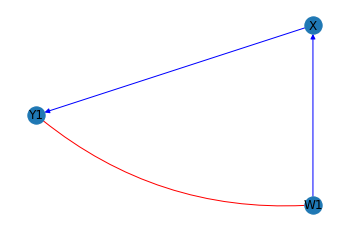

In [3]:
for identification in line_7_example.identifications:
    for id_in in identification['id_in']:
        print(id_in.query.get_variables())
        display(id_in.query)
        display(id_in.graph.draw())
    for id_out in identification['id_out']:
        print(id_out.query.get_variables())
        #display(id_out.graph.draw())

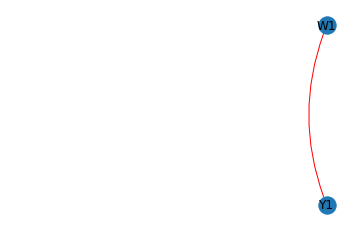

In [11]:
id_out.graph.draw()

In [12]:
id_out.estimand

Product(expressions=(P(Distribution(children=(Variable(name='Y1'),), parents=(Variable(name='X'), Variable(name='W1')))), P(Distribution(children=(Variable(name='W1'),), parents=()))))

In [5]:
outcomes, treatments = get_outcomes_and_treatments(query=identification["id_in"][0].query)
outcomes, treatments

({'Y'}, {'X', 'Z'})

In [15]:
id_in.graph.nodes()

NodeView(('X', 'Y', 'Z'))

In [6]:
outcomes, treatments = get_outcomes_and_treatments( query=id_in.query )
line6_estimand = line_6(outcomes=outcomes,
                  treatments=treatments,
                  estimand=id_in.estimand,
                  G= id_in.graph)
dir(line6_estimand)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_abc_impl',
 '_iter_variables',
 '_repr_latex_',
 'expressions',
 'get_variables',
 'to_latex',
 'to_text']

In [5]:
outcomes, treatments = get_outcomes_and_treatments( query=id_in.query )
line7_id = line_7(outcomes=outcomes,
                  treatments=treatments,
                  estimand=id_in.estimand,
                  G= id_in.graph)
line7_id

Identification(query=P(Distribution(children=(CounterfactualVariable(name='Y1', interventions=(Intervention(name='W1', star=False),)),), parents=())), estimand=Product(expressions=(P(Distribution(children=(Variable(name='W1'),), parents=())), P(Distribution(children=(Variable(name='Y1'),), parents=(Variable(name='W1'), Variable(name='X')))))), graph=NxMixedGraph(directed=<networkx.classes.digraph.DiGraph object at 0x7f95c8387760>, undirected=<networkx.classes.graph.Graph object at 0x7f95c8387610>))

In [5]:
id_in

Identification(query=P(Distribution(children=(CounterfactualVariable(name='Y1', interventions=(Intervention(name='X', star=False), Intervention(name='W1', star=False))),), parents=())), estimand=P(Distribution(children=(Variable(name='X'), Variable(name='Y1'), Variable(name='W1')), parents=())), graph=NxMixedGraph(directed=<networkx.classes.digraph.DiGraph object at 0x7fbeb0262d30>, undirected=<networkx.classes.graph.Graph object at 0x7fbeb0262d90>))

In [6]:
id_in.query

P(Distribution(children=(CounterfactualVariable(name='Y1', interventions=(Intervention(name='X', star=False), Intervention(name='W1', star=False))),), parents=()))

In [7]:
id_in.estimand

P(Distribution(children=(Variable(name='X'), Variable(name='Y1'), Variable(name='W1')), parents=()))

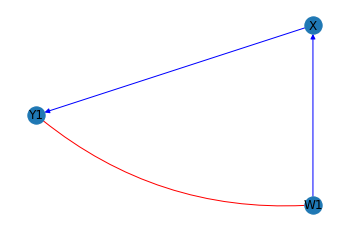

In [9]:
id_in.graph.draw()

In [17]:
ID(line_1_example.identifications[0]['id_in'][0]) 

False

In [18]:
line_1_example.identifications[0]['id_out'][0].estimand

Sum(expression=P(Distribution(children=(Variable(name='Y'), Variable(name='Z')), parents=())), ranges=(Variable(name='Z'),))

In [9]:
P(Variable('Y_1'))

P(Distribution(children=(Variable(name='Y_1'),), parents=()))

In [10]:
line7_id.graph.nodes()

NodeView(('Y1', 'W1'))

In [ ]:
for identification in line_4_example.identifications:
            outcomes, treatments = query_to_outcomes_and_treatments(query= identification['id_in'][0].query )
            actuals = line_4(
                outcomes   = outcomes,
                treatments = treatments,
                estimand   = identification['id_in'][0].estimand,
                G          = identification['id_in'][0].graph)
            expecteds = identification['id_out']


In [10]:
expr_equal(line3_id.query, id_out.query)

False

In [15]:
set(line3_id.query.get_variables()) == set(id_out.query.get_variables())


False

In [13]:
line3_id.query

P(Distribution(children=(CounterfactualVariable(name='Y', interventions=(Intervention(name='Z', star=False), Intervention(name='X', star=False))),), parents=()))

In [16]:
expr_equal(P(Y @[Z,X]), P(Y @ [X,Z]))

False

In [17]:
P(Y @ [Z,X]).get_variables() 

{Intervention(name='X', star=False),
 CounterfactualVariable(name='Y', interventions=(Intervention(name='Z', star=False), Intervention(name='X', star=False))),
 Intervention(name='Z', star=False)}

In [19]:
P(Y @ [X, Z]).get_variables()

{Intervention(name='X', star=False),
 CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False), Intervention(name='Z', star=False))),
 Intervention(name='Z', star=False)}

In [8]:
id_out.query

P(Distribution(children=(CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False), Intervention(name='Z', star=False))),), parents=()))

In [5]:
id_out.estimand

Sum(expression=P(Distribution(children=(Variable(name='Y'), Variable(name='Z')), parents=())), ranges=(Variable(name='Z'),))

In [21]:
expected_vars = P(Y @ set([X,Z])).get_variables()
canonicalize(P(Y @ set([Z,X])), expected_vars)

P(Distribution(children=(CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False), Intervention(name='Z', star=False))),), parents=()))

In [22]:
expected_vars = P(Y @ set([Z,X])).get_variables()
canonicalize(P(Y @ set([X,Z])), expected_vars)

P(Distribution(children=(CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False), Intervention(name='Z', star=False))),), parents=()))

In [23]:
canonicalize(P(Y @ {X,Z}), expected_vars)

P(Distribution(children=(CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False), Intervention(name='Z', star=False))),), parents=()))

In [24]:
P(Y @ {X,Z}) == P(Y @ {Z,X})

True

# IDC algorithm

$$\newcommand\ci{\perp\!\!\!\perp}$$
$$\newcommand{\ubar}[1]{\underset{\bar{}}{#1}}
\newcommand{\obar}[1]{\overset{\bar{}}{#1}}$$

$\text{function }\mathbf{IDC}\left(\mathbf y, \mathbf x,\mathbf z, P, G\right) \\ \text{INPUT: } \mathbf{x,y, z}\text{ value assignments, $P$ a probability distribution, $G$ a causal diagram (an I-map of P)}. \\  \text{OUTPUT:  Expression for $P_{\mathbf x}(\mathbf y|\mathbf z)$ in terms of $P$ or $\mathbf{FAIL}(F, F')$} $


1. $\text{if } (\exists Z \in \mathbf{Z})(\mathbf{Y} \ci Z | \mathbf{X}, \mathbf{Z}- \{Z\})_{G_{\bar{\mathbf{X}}\ubar{Z}}} \\
\text{return } \mathbf{IDC}(\mathbf y, \mathbf x \cup \{z\}, \mathbf z - \{z\}, P, G)\\ $
2. $\text{ else, let } P' = \mathbf{ID}(\mathbf y \cup \mathbf z, \mathbf x, P, G). \\
\text{ return } P'/\sum{\mathbf y}P'$.